# 4장. 오차 수정하기: 경사 하강법

기울기 a를 너무 크게 잡으면 오차가 커지고, 기울기를 너무 작게 잡아도 오차가 커진다. <br>
그래프에서 오차가 가장 작을 때: x가 그래프의 가장 아래쪽의 볼록한 부분에 이르렀을 때 <br>
즉, 기울기 a가 m 위치에 있을 때

경사 하강법: 미분 기울기를 이용하는 방법. 그래프에서 오차를 비교하여 가장 작은 방향으로 이동시키는 방법

<hr>

## 1. 경사 하강법의 개요

최솟값 m에서의 순간 기울기<br>
꼭짓점의 기울기는 x축과 평행한 선 = 기울기가 0

< 미분 값이 0인 지점 찾기 ><br>
1. a1에서 미분을 구한다. <br>
2. 구해진 기울기의 반대 방향(기울기가 +면 음의 방향, -면 양의 방향)으로 얼마간 이동시킨 a2에서 미분을 구한다. <br>
3. 위에서 구한 미분 값이 0이 아니면 위 과정을 반복한다.

경사 하강법은 이렇게 반복적으로 기울기 a를 변화시켜서 m의 값을 찾아내는 방법임.

<hr>

## 2. 학습률

학습률: 이동 거리를 정해주는 것 <br>
딥러닝에서 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 최적화 과정 중 하나임.

경사 하강법은 오차의 변화에 따라 이차 함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것.

<hr>

## 3. 코딩으로 확인하는 경사 하강법

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 공부 시간 x와 성적 y의 리스트를 만들기
data=[[2,81],[4,93],[6,91],[8,97]]
x=[i[0] for i in data]
y=[i[1] for i in data]

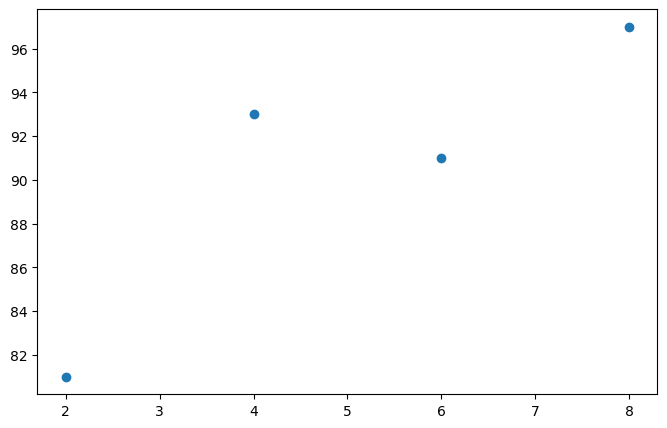

In [5]:
# 그래프로 나타내기
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

In [6]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함)
x_data=np.array(x)
y_data=np.array(y)

In [7]:
# 기울기 a와 절편 b의 값 초기화
a=0
b=0

In [8]:
# 학습률 정하기
lr=0.03
# 몇 번 반복될 지 설정
epochs=2001

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


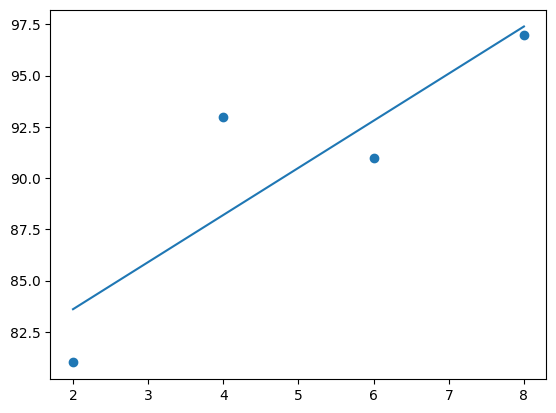

In [10]:
# 경사 하강법 시작
for i in range(epochs): # 에포크 수만큼 반복
  y_pred=a*x_data+b # 오차 함수인 y=ax+b를 정의한 부분
  error=y_data-y_pred # 실제값 - 예측값, 즉 오차를 구하는 식

  # 평균 제곱 오차(오차 함수)를 a로 미분한 결과
  a_diff=-(2/len(x_data))*sum(x_data*(error))
  # 평균 제곱 오차(오차 함수)를 b로 미분한 결과
  b_diff=-(2/len(x_data))*sum(error)

  a=a-lr*a_diff # 미분 결과에 학습률을 곱한 후 기존의 a값을 업데이트
  b=b-lr*b_diff # 미분 결과에 학습률을 곱한 후 기존의 b값을 업데이트

  if i%100==0: # 100번 반복될 때마다 현재의 a값, b값 출력
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" %(i,a,b))

# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred=a*x_data+b
plt.scatter(x,y)
plt.plot([min(x_data),max(x_data)],[min(y_pred),max(y_pred)])
plt.show()

Tip. 여기서 에포크(epoch)는 입력 값에 대해 몇 번이나 반복하여 실험했는지를 나타냄

최소 제곱법을 쓰지 않고 평균 제곱 오차와 경사 하강법을 통해 원하는 값을 구할 수 있음 <br>
이와 똑같은 방식을 x가 여러 개인 다중 선형 회귀에서도 사용함

<hr>

## 4. 다중 선형 회귀란

더 정확한 예측을 하려면 추가 정보를 입력해야 하며, 정보를 추가해 새로운 예측 값을 구하려면 변수의 개수를 늘려 다중 선형 회귀를 만들어 줘야 함.

y = a1x1 + a2x2 + b

<hr>

## 5. 코딩으로 확인하는 다중 선형 회귀

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3D 그래프 그리는 라이브러리 가져오기

In [17]:
# 공부 시간 x와 성적 y의 리스트 만들기
data=[[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1=[i[0] for i in data]
x2=[i[1] for i in data]
x3=[i[2] for i in data]

<ipython-input-19-e09e79209c4f>:7: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=11


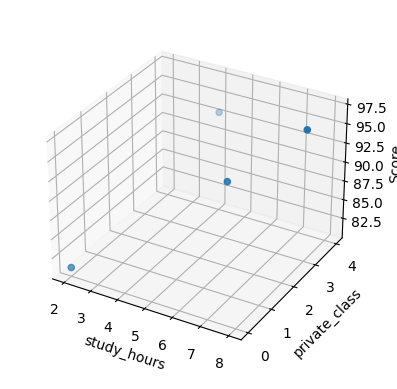

In [19]:
# 그래프로 확인
ax=plt.axes(projection='3d') # 그래프 유형 정하기
ax.set_xlabel('study_hours') # x축 이름
ax.set_ylabel('private_class') # y축 이름
ax.set_zlabel('Score') # z축 이름

ax.dist=11
ax.scatter(x1,x2,y)
plt.show()

In [20]:
# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스로 하나씩 불러와 계산할 수 있도록 하기 위함)
x1_data=np.array(x1)
x2_data=np.array(x2)
y_data=np.array(y)

In [21]:
# 기울기 a와 절편 b의 값 초기화
a1=0
a2=0
b=0

In [22]:
# 학습률
lr=0.02
# 몇 번 반복할지 설정(0부터 세므로 원하는 반복 횟수에 +1)
epochs=2001

In [23]:
# 경사 하강법 시작
for i in range(epochs): #epoch 수 만큼 반복
  y_pred=a1*x1_data+a2*x2_data+b # y를 구하는 식을 세우기
  error=y_data-y_pred # 오차를 구하는 식

  a1_diff=-(2/len(x1_data))*sum(x1_data*(error)) # 오차 함수를 a1로 미분한 값
  a2_diff=-(2/len(x2_data))*sum(x2_data*(error)) # 오차 함수를 a2로 미분한 값
  b_diff=-(2/len(x1_data))*sum(y_data-y_pred) # 오차 함수를 b로 미분한 값

  a1=a1-lr*a1_diff # 학습률을 곱해 기존의 a1값 업데이트
  a2=a2-lr*a2_diff # 학습률을 곱해 기존의 a2값 업데이트
  b=b-lr*b_diff # 학습률을 곱해 기존의 b값 업데이트

  if i%100==0: # 100번 반복될 때마다 현재의 a1,a2,b값 출력
    print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f"%(i,a1,a2,b))

epoch=0, 기울기1=18.5600, 기울기2=8.4500, 절편=3.6200
epoch=100, 기울기1=7.2994, 기울기2=4.2867, 절편=38.0427
epoch=200, 기울기1=4.5683, 기울기2=3.3451, 절편=56.7901
epoch=300, 기울기1=3.1235, 기울기2=2.8463, 절편=66.7100
epoch=400, 기울기1=2.3591, 기울기2=2.5823, 절편=71.9589
epoch=500, 기울기1=1.9546, 기울기2=2.4427, 절편=74.7362
epoch=600, 기울기1=1.7405, 기울기2=2.3688, 절편=76.2058
epoch=700, 기울기1=1.6273, 기울기2=2.3297, 절편=76.9833
epoch=800, 기울기1=1.5673, 기울기2=2.3090, 절편=77.3948
epoch=900, 기울기1=1.5356, 기울기2=2.2980, 절편=77.6125
epoch=1000, 기울기1=1.5189, 기울기2=2.2922, 절편=77.7277
epoch=1100, 기울기1=1.5100, 기울기2=2.2892, 절편=77.7886
epoch=1200, 기울기1=1.5053, 기울기2=2.2875, 절편=77.8209
epoch=1300, 기울기1=1.5028, 기울기2=2.2867, 절편=77.8380
epoch=1400, 기울기1=1.5015, 기울기2=2.2862, 절편=77.8470
epoch=1500, 기울기1=1.5008, 기울기2=2.2860, 절편=77.8518
epoch=1600, 기울기1=1.5004, 기울기2=2.2859, 절편=77.8543
epoch=1700, 기울기1=1.5002, 기울기2=2.2858, 절편=77.8556
epoch=1800, 기울기1=1.5001, 기울기2=2.2858, 절편=77.8563
epoch=1900, 기울기1=1.5001, 기울기2=2.2857, 절편=77.8567
epoch=2000, 기울기1=1.5000, 기울기2=2.